In [11]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd

In [18]:
assist_data_path = '../dataset/assist2009_updated/'


In [19]:
ls "../dataset/"

 驱动器 D 中的卷是 新加卷
 卷的序列号是 A867-9B26

 D:\workspaces\CKT\dataset 的目录

2020/02/21  16:16    <DIR>          .
2020/02/21  16:16    <DIR>          ..
2020/02/20  17:02    <DIR>          assist2009_updated
2020/02/19  13:47    <DIR>          assist2015
2020/02/19  14:34    <DIR>          raw data
2020/02/19  13:47    <DIR>          STATICS
2020/02/19  13:47    <DIR>          synthetic
               0 个文件              0 字节
               7 个目录 32,322,330,624 可用字节


In [20]:
def parse_csvdata(csv_path):
    practice_number_list = []
    knowledge_matrix = []
    result_matrix = []

    with open(csv_path) as f:
        for idx, line in enumerate(f.readlines()):
            if idx % 3 == 0:
                per_practice_number = int(line)
                practice_number_list.append(per_practice_number)
            if (idx - 1) % 3 == 0:
                per_knowledge_list = list(map(lambda x: int(x), line[:-1].split(',')))
                knowledge_matrix.append(per_knowledge_list)
            if (idx - 2) % 3 == 0:
                per_result_list = list(map(lambda x: int(x), line[:-1].split(',')))
                result_matrix.append(per_result_list)
                
    return practice_number_list, knowledge_matrix, result_matrix

In [21]:
csv_file = assist_data_path + 'assist2009_updated_train3.csv'
practice_number_list, knowledge_matrix, result_matrix = parse_csvdata(csv_file)


In [22]:
practice_numbers = np.array(practice_number_list)
# practice_numbers = np.sort(practice_numbers)
s = pd.DataFrame({'pn': practice_numbers})
s.describe()

,pn
count,2373.00000
mean,79.82343
std,160.11401
min,1.00000
25%,9.00000
50%,23.00000
75%,71.00000
max,1261.00000


In [23]:
s[s['pn'] < 16].describe()

,pn
count,913.000000
mean,7.228916
std,4.113941
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,15.000000


In [24]:
print(s[s['pn'] > 150].count()/s.count() * 100, '%')

pn    13.105773
dtype: float64 %


In [25]:
grouped = s.groupby('pn').size()
# count = grouped.agg(np.size)
print(type(grouped))

<class 'pandas.core.series.Series'>


In [33]:
s.groupby('pn').groups

{1: Int64Index([  23,   35,   44,   48,   50,  127,  139,  141,  143,  204,  211,
              251,  253,  282,  334,  394,  466,  529,  544,  591,  759,  924,
              950, 1001, 1095, 1108, 1110, 1111, 1112, 1133, 1150, 1176, 1186,
             1205, 1231, 1261, 1402, 1404, 1420, 1515, 1561, 1586, 1622, 1629,
             1633, 1635, 1642, 1659, 1667, 1690, 1697, 1760, 1802, 1809, 1838,
             1840, 1918, 1919, 1969, 1987, 2046, 2133, 2143, 2176, 2187, 2191,
             2222, 2294, 2310, 2326],
            dtype='int64'),
 2: Int64Index([  33,   54,  181,  200,  237,  284,  286,  290,  291,  292,  329,
              331,  364,  406,  407,  420,  421,  429,  470,  525,  537,  570,
              608,  649,  661,  662,  673,  687,  728,  768,  791,  827,  867,
              886,  898,  920,  926,  991,  993,  999, 1007, 1013, 1041, 1073,
             1148, 1175, 1183, 1190, 1230, 1236, 1241, 1398, 1449, 1510, 1576,
             1579, 1589, 1686, 1699, 1770, 1792, 1798, 1800

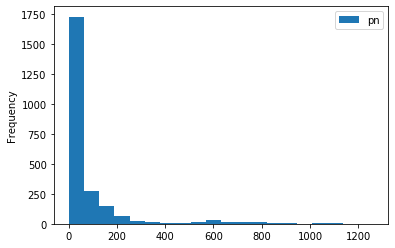

In [65]:
# s的解释：第一列是记录的索引；第二列是一条记录的题目个数
# 直方图解释：横坐标表示题目个数（practice_number）,纵坐标表示频次，即有着该pn的记录出现的频次（有多少条记录做了10道题？）
s.plot.hist(bins=20)

In [61]:
# pn: 一组数据的做题数量
# 训练数据中有pn个数量的记录频次
grouped

pn
1       70
2       94
3       38
4       69
5       89
        ..
1103     1
1118     1
1177     1
1235     1
1261     1
Length: 360, dtype: int64

In [37]:
s

,pn
0,64
1,15
2,822
3,5
4,56
...,...
2368,59
2369,15
2370,6
2371,12


In [69]:
print(s[(s['pn'] < 200) & (s['pn'] > 5)].count()/s.count() * 100)

print(s[s['pn'] == 5].count() / s.count() * 100)

pn    75.85335
dtype: float64


In [74]:
s["idx"] = s.index

In [75]:
s

,pn,idx
0,64,0
1,15,1
2,822,2
3,5,3
4,56,4
...,...,...
2368,59,2368
2369,15,2369
2370,6,2370
2371,12,2371


In [70]:
cut = s[(s['pn'] < 200) & (s['pn'] > 5)]
print(cut)

      pn
0     64
1     15
4     56
6     29
8     41
...   ..
2367  34
2368  59
2369  15
2370   6
2371  12

[1800 rows x 1 columns]
